## GENDER INCOME GAP

### Chris Prince (cmp670)

**Using Dr. Bianco's workbook as a template.**

You may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer a woman job candidate, given what I would offer a man for the same job?)




In [1]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl
from matplotlib import pyplot as plt

#import json
import os
#s = json.load( open(os.getenv('PUI2015')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#The gender gap(non mandatory viewing)
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

unfortunately a lot of the links that i originally used a few weeks ago are broken now. I posted the data I had used on the class webpage here (together with data for the buildings & energy homework): http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data

In [3]:
#to use the url just pass it to pandas read_excel
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"

#set codes used to identify files:
#'aoic' = 'alone or in combination'
#'hisp' = hispanic
races={1: 'All', 2: 'white_aoic', 3:'white', 4:'white_nonhisp', 
       5: 'black_aoic', 6: 'black', 7:'asian_aoic', 8:'asian', 9:'all_hisp'}
genders={2: 'male', 3: 'female'}

#all data will be loaded into two dictionaries nested within the single income dictionary
income={}
for gcode, gender in genders.items():
    income[gender]={}
    for rcode, race in races.items():
        income[gender][race] = pd.read_excel(url+'/pinc08_%i_1_%i'%(gcode, rcode), header=9)

##exploratory phase

In [4]:
#What fields are we dealing with?
print income['female']['All'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

These column names will be a pain, so let's rename them.

In [5]:
#We want to rename based on a few rules, 
#so setup a replaceall function:
def replaceall(strng, dct):
    for k, v in dct.items():
        strng = strng.replace(k, v)
    return strng

In [6]:
#Replaceall using a dictionary first, then explicitly replace spaces
replacedict = {'$': '', ',': '', ' to ': '-', ' and over': '+'}
oldcols = income['male']['All'].columns
newcols = pd.Index([replaceall(col, replacedict).replace(' ', '_') 
                    for col in oldcols])
print newcols

Index([   u'Characteristic', u'Total_with_Income',    u'1-2499_or_loss',
               u'2500-4999',         u'5000-7499',         u'7500-9999',
             u'10000-12499',       u'12500-14999',       u'15000-17499',
             u'17500-19999',       u'20000-22499',       u'22500-24999',
             u'25000-27499',       u'27500-29999',       u'30000-32499',
             u'32500-34999',       u'35000-37499',       u'37500-39999',
             u'40000-42499',       u'42500-44999',       u'45000-47499',
             u'47500-49999',       u'50000-52499',       u'52500-54999',
             u'55000-57499',       u'57500-59999',       u'60000-62499',
             u'62500-64999',       u'65000-67499',       u'67500-69999',
             u'70000-72499',       u'72500-74999',       u'75000-77499',
             u'77500-79999',       u'80000-82499',       u'82500-84999',
             u'85000-87499',       u'87500-89999',       u'90000-92499',
             u'92500-94999',       u'95000-97499', 

In [7]:
#all files have the same headers, so we can reuse the columns above for all sets:
for g in genders.values():
    for r in races.values():
        income[g][r].rename(columns = dict(zip(oldcols, newcols)), inplace=True)

In [8]:
#let's see what the data looks like with the new headers
income['female']['black']

,Characteristic,Total_with_Income,1-2499_or_loss,2500-4999,5000-7499,7500-9999,10000-12499,12500-14999,15000-17499,17500-19999,...,92500-94999,95000-97499,97500-99999,100000+,Median_income,Unnamed:_44,Mean_income,Unnamed:_46,Gini_ratio,Unnamed:_48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,14346,821,679,768,1344,1117,863,971,597,...,7,29,22,294,20044,348,27195,438,0.462,0.0061
2,Earnings,9792,552,405,413,335,595,307,715,384,...,5,28,13,225,25971,373,31235,584,0.427,0.0075
3,..Wages and Salary,9516,539,391,380,306,592,291,684,360,...,5,28,13,216,26165,380,31404,597,0.425,0.0075
4,..Nonfarm Self-Employment,408,101,30,49,21,26,14,37,21,...,0,0,0,9,10313,1885,16691,2031,0.606,0.0302
5,..Farm Self-Employment,91,70,9,0,6,0,0,2,0,...,0,0,0,0,1630,168,2473,1147,0.826,0.0483
6,Social Security,2948,109,176,267,680,563,497,235,198,...,0,0,0,0,11079,187,11935,211,0.263,0.0091
7,SSI (Supplemental Security Income),911,137,134,70,486,33,9,28,3,...,0,0,0,0,8089,106,7214,234,0.288,0.0186
8,Public Assistance,582,259,157,113,40,7,0,3,0,...,0,0,0,0,3015,325,3710,232,0.426,0.0219
9,Veterans Benefits,100,11,16,10,11,11,17,1,3,...,0,0,0,0,10330,1894,13349,2044,0.455,0.0416


I attempted a few different methods to smartly mask the data to strip non-numerics, but did not get it to work.

In [ ]:
#dfincome = pd.DataFrame(income)

#realmask = pd.DataFrame(dfincome.applymap(np.isreal))
#realmask.female.All

#dfincome.applymap(lambda x: np.float(x) if np.isreal(x) else np.float('NaN'))

#dfincome.where(~dfincome.applymap(np.isreal), np.float('NaN'))
#dfincome.where(~realmask, np.float('NaN'))

In [9]:
#... so I'm using a modified version the code provided in the template notebook.

for g in income:
    for r in income[g]:
        nonreal  = income[g][r].applymap(np.isreal)
        for c in income[g][r].columns :
            if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
                income[g][r][c][~nonreal[c]] = np.float('NaN')
                income[g][r][c] = income[g][r][c].astype(float)


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
#put the data in a dataframe
dfincome=pd.DataFrame(income)

Plotting the scatter matrix for the entire dataframe eats up all my memory and crashes the machine. So I'm plotting a subset, of the fields that might actually be interesting (it's tough to see how there will be much insight to gain from plotting each of the income bins). We use the 'All' data for men and women.

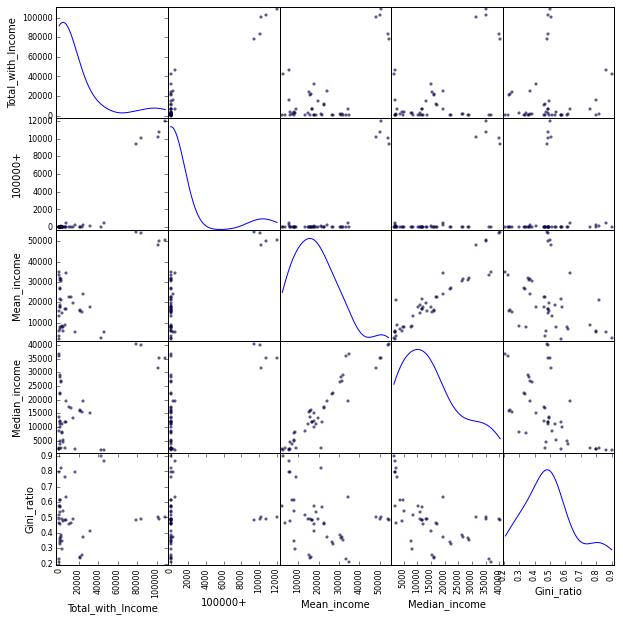

In [11]:
from pandas.tools.plotting import scatter_matrix

#Our columns of interest
scattercols = ['Total_with_Income', '100000+', 'Mean_income', 
               'Median_income', 'Gini_ratio']
fig = plt.figure(figsize(10,10))
m = scatter_matrix(dfincome.male.All[scattercols], diagonal='kde')

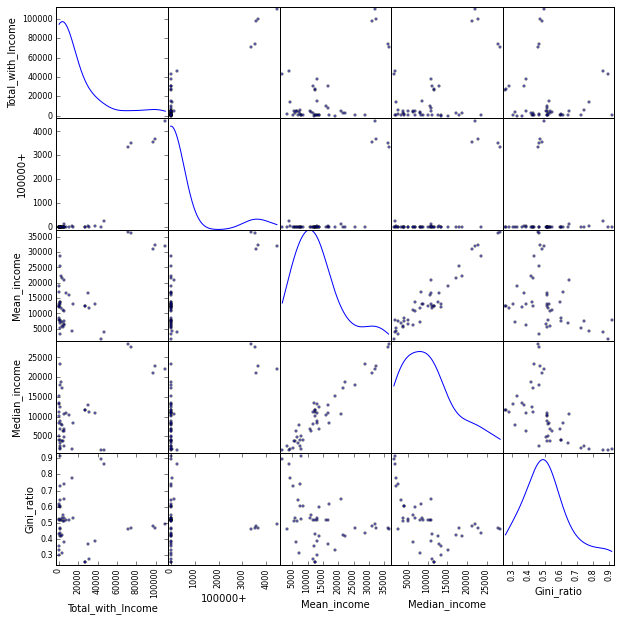

In [12]:
plt.figure(figsize(10,10))
f = scatter_matrix(dfincome.female.All[scattercols], diagonal='kde')

Look at that! Mean and median seem to be related! Who would have guessed? The other relationships are not particularly illuminating.

##to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males by race (one data point per race)

##also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay
(make the plot and describe it in a "caption" in the cell below the plot)

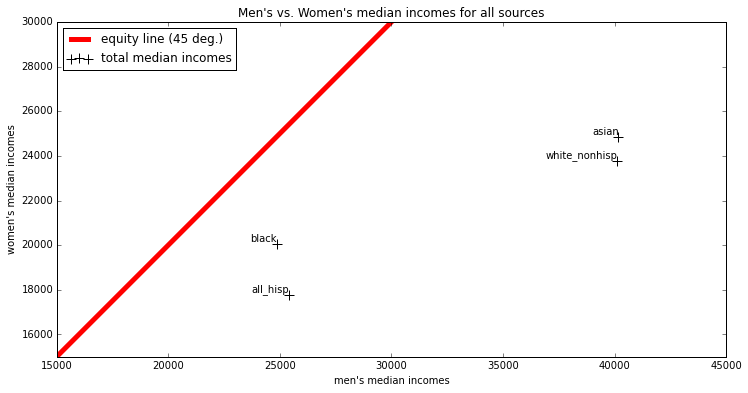

In [13]:
mens_income_medians = []
womens_income_medians = []
racelist = []

#Collect the median incomes from each of the races we are interested in
simplifiedraces = ['white_nonhisp', 'black', 'asian', 'all_hisp']
for r in simplifiedraces:
    mens_income_medians.append(dfincome['male'][r]['Median_income'][1])
    womens_income_medians.append(dfincome['female'][r]['Median_income'][1])
    racelist.append(r)
    
#Convert the medians to pandas Series
mens_income_medians = pd.Series(mens_income_medians)
womens_income_medians = pd.Series(womens_income_medians)

#we want to reuse these plots, so place them in a function:
def scattermedians():
    fig = pl.figure(figsize(12,6))
    pl.scatter(mens_income_medians, womens_income_medians, 
               marker='+', s=100, c='black', label='total median incomes')
    pl.plot([0,45000],[0,45000], '-', c='r', label='equity line (45 deg.)', lw=5)
    #label the plot next to each point
    for label, x, y in zip(racelist, mens_income_medians, womens_income_medians):
        plt.annotate(
            label, 
            xy = (x, y), xytext = (0, 0),
            textcoords = 'offset points', ha = 'right', va = 'bottom') 
    #format the limits and add labels, title and legend
    plt.xlim((15000,45000))
    plt.ylim((15000,30000))
    plt.xlabel("men's median incomes")
    plt.ylabel("women's median incomes")
    plt.title("Men's vs. Women's median incomes for all sources")
    pl.legend(loc='upper left')

scattermedians()

#Now fit it with a line!
you can use statsmodels, or scipy, numpy, or create your own residual minimization function. 
if you want to use numpy (and you do not have to!) you can for example use 


pl.plot(newx,np.poly1d(np.ployfit(x,y,1))(newx)

to make and plot the fit in one line (although this way you did not save the parameters so you need to rerun the function to get the slope and intercept ... :-/

why not challenge yourself (if you want) and  create your own residual minimization function you can minimize it with scipy instead of a nested for loop (which is called 'brute force minimization')

from scipy.optimize import minimize

def line ().....
    #this would be a function that creates a line given parameters, like we did in class
    ...
    return y
def residuals(data, model, error=None):
    #you can add errors if you want
    you want to return the sum of the residuals (difference b/w data and model **2)
    return residuals

you need an initial guess for the parameters, where you start searching. it has to be a single variable, so for 2 parameters make a list of 2 elements. the numbers inside do not have to be 0 and 1 - but choose something not too crazy or your minimization will get lost!

p0 = [0,1] 

result = minimize(residuals, p0, args=(all_males, all_females))

in args i put all arguments of the function residuals that are not to be evaluated for the minimization (in this case the data)

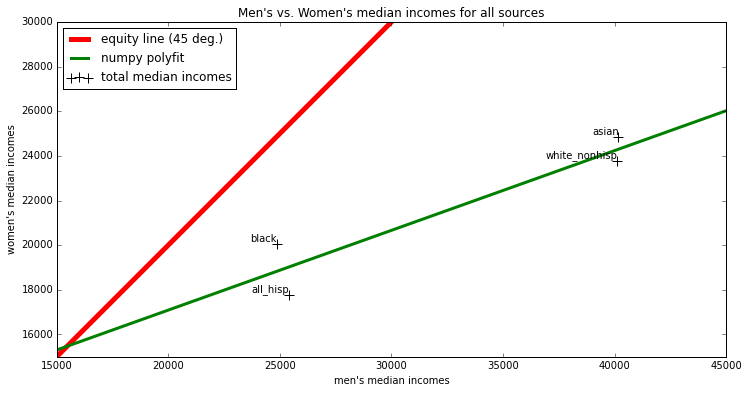

In [14]:
#use polyfit
p = np.polyfit(mens_income_medians, womens_income_medians, 1)
x = arange(0,50000)
def add_polyfit():
    #call the first graph
    scattermedians()
    #plot the fit
    plt.plot(x, np.poly1d(p)(x), color='green', label='numpy polyfit', lw=3)
    plt.legend(loc='upper left')

add_polyfit()

It turns out that there is an analytical solution for the OLS regression it is coded below. please try to read the code and understand the formula! 


In [15]:
import scipy.stats as stats

#For some reason, the stats package gives me an incorrect(?) value that appears too precise:
cor = stats.spearmanr(womens_income_medians, mens_income_medians)[0]
print cor

#So we use the correlation coefficient matrix in numpy instead
#The fit below justifies this change
cor = np.corrcoef(womens_income_medians, mens_income_medians)[0,1]
print cor
beta1 = cor * womens_income_medians.std() / mens_income_medians.std()
beta0 = womens_income_medians.mean() - beta1 * mens_income_medians.mean()
print 'beta_0: %.3f, beta_1: %.3f'%(beta0, beta1)

0.8
0.942335489633
beta_0: 9943.720, beta_1: 0.357


Plot the line corresponding to the analytical regression to compare it with the result of your numerical one

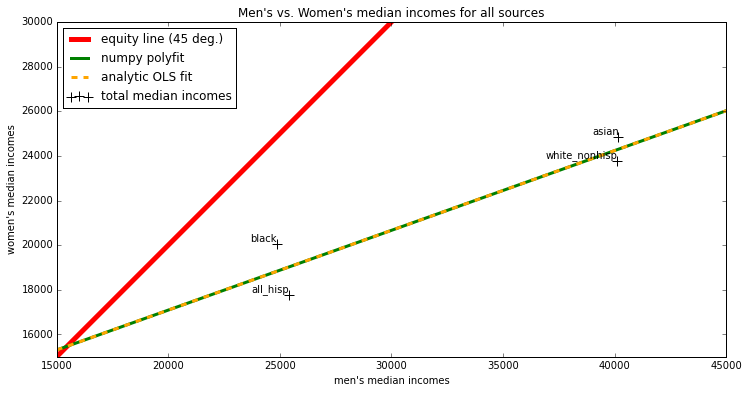

In [16]:
def add_analyticfit():
    #call our second graph
    add_polyfit()
    #add the analytic fit as a dashed line (matches our earlier line)
    plt.plot(x, beta1*x + beta0, '--', c='orange', label='analytic OLS fit', lw=3)
    plt.legend(loc='upper left')
    
add_analyticfit()

#this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

if you use one data point for source of income (along the 'Median income' column) and fit a line and the line fit is similar then the median income was representative fo all forms of income for this analysis

to unravel the data and concatenate them back together in a single array is a little complex (there may be easier way, this is just wha i came up with. if you have something better please share!!)
here ar a few lines of code that should do the trick. i used nu.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. i also masked the nan values. i used the numpy ma (masled array) package. ever array is associated by this package to a mask array of Bools [True....False...] of the same size. the 

In [17]:
#Get all of the values in the Median_income columns:
all_males = np.ma.array([dfincome.male[r]['Median_income'][:].values 
                         for r in simplifiedraces])
all_females = np.ma.array([dfincome.female[r]['Median_income'][:].values 
                           for r in simplifiedraces])

allmask = [np.isnan(all_males) + np.isnan(all_females)]

all_females.mask = allmask
all_males.mask = allmask

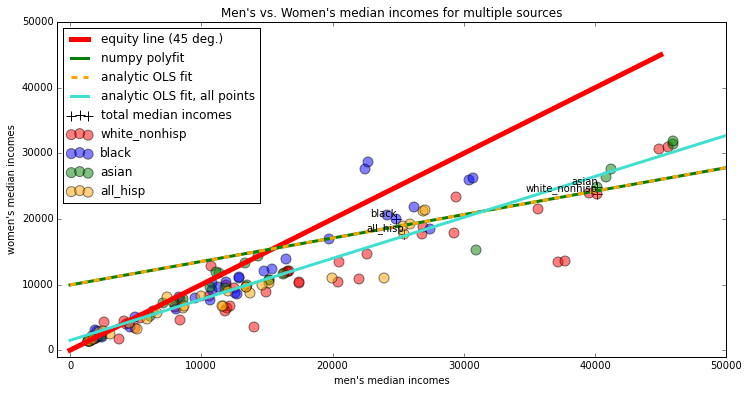

In [18]:
#use same fitting routine to calculate analytic solution
cor2 = np.ma.corrcoef(all_females.flatten(), all_males.flatten())[0,1]
beta12 = cor2 * all_females.flatten().std() / all_males.flatten().std()
beta02 = all_females.flatten().mean() - beta12 * all_males.flatten().mean()

#Call the previous graph
add_analyticfit()
#Set colors to use per race
colors=['red','blue','green','orange']
for i in range(4):
    plt.scatter(all_males[i], all_females[i], c=colors[i], 
                label=simplifiedraces[i], alpha=0.5, s=100)
#Add analytic solution line for all data
plt.plot(x, beta12*x+beta02, c='turquoise', 
         label='analytic OLS fit, all points', lw=3)
#Set new limits
plt.xlim((-1000,50000))
plt.ylim((-1000,50000))
plt.title("Men's vs. Women's median incomes for multiple sources")
plt.legend(loc='upper left')

##Now pick a stipend, maybe your ideal stipend? 
##and predict what a woman in a position where a man recieves your ideal stipend would make

For simplicity we pick $100k.


In [19]:
beta12*100000 + beta02

63955.683418087916

This implies that the ratio of earnings for women to men is only 0.64. The statistic mentioned at the top, 78%, carries other assumptions that are not controlled for here (the distribution of employment types in NYC, etc.)

##lastly do you have any comments about what these data tell us about race? how you would go about analyzing race differences with these data? (just a few sentences)

There is less to say about race than there is about the relative income levels. It appears that income may be more equitable among the genders for lower income people. Larger deviations from the 45 degree line occur at higher incomes.

If one were to test for race, we could perform the same analysis here on the subsetted data. We can look at the coefficients of the linear fits; the closer the slope is to 1, the male-female distribution of income is less dependent on income bracket. The closer the intercept is to 0, the smaller the 'gender bonus' is for being male.